Gerekli Kütüphanelerin Yüklenmesi ve NLTK İndirmeleri


In [5]:
!pip install unidecode

import pandas as pd
import nltk
import re
import string
from unidecode import unidecode #fonksiyon
from nltk.tokenize import word_tokenize #fonksiyon
from nltk import pos_tag #fonksiyon
from nltk.stem import WordNetLemmatizer #Sınıf
from nltk.corpus import stopwords #modül

# NLTK veri indirmeleri
nltk.download('punkt_tab')  # Tokenizasyon için gerekli
nltk.download('averaged_perceptron_tagger_eng')  # POS tagging için gerekli
nltk.download('wordnet')  # Lemmatizasyon için gerekli
nltk.download('stopwords')  # Stopwords (durak kelimeler) için gerekli

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Maksimum Sütun Genişliği Ayarı

In [6]:
pd.set_option('display.max_colwidth',None)

CSV Dosyasının Yüklenmesi

In [7]:
df_tech = pd.read_csv('techCrunch_news.csv', encoding='utf-8')
df_medical = pd.read_csv('newsMedical_news.csv', encoding='utf-8')
df_final = pd.read_csv('final_news.csv', encoding='utf-8')

df_final

Category  \
0    Technical   
1    Technical   
2    Technical   
3    Technical   
4    Technical   
..         ...   
205  Technical   
206  Technical   
207  Technical   
208  Technical   
209  Technical   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

DataFrame Bilgisi ve Veri Yapısının Görüntülenmesi

In [8]:
df_final.info()
print(" ")
print(df_final["Category"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  210 non-null    object
 1   Content   210 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB
 
Category
Technical    105
Medicine     105
Name: count, dtype: int64


Eksik Verilerin Kontrolü ve Temizlenmesi

In [9]:
print(df_final.isna().sum())

df_final.dropna(subset=['Content'],inplace=True)

Category    0
Content     0
dtype: int64


Metin Küçük Harfe Çevirme (Lowercase)

In [10]:
def convert_lowercase(content):
    return content.lower()

df_final['Content'] = df_final['Content'].apply(convert_lowercase)
df_tech['Content'] = df_tech['Content'].apply(convert_lowercase)
df_medical['Content'] = df_medical['Content'].apply(convert_lowercase)

#-------------Örnek-------------
abc = "HelLO"
print(convert_lowercase(abc))

hello


Tokenizasyon (Kelimeye Ayırma) Fonksiyonu

In [11]:
# Tokenizasyon fonksiyonu (Kelimeye ayırma)
def tokenizasyon(content):
    return word_tokenize(content) #NLTK kütüphanesinin bir fonksiyonu

#-------------Örnek-------------
abc = "I am learning Python"
print (tokenizasyon(abc))

['I', 'am', 'learning', 'Python']


Kelime Lemmatisasyonu

In [12]:
# WordNetLemmatizer sınıfından bir nesne oluşturuluyor.
lemmatizer = WordNetLemmatizer()

# LEMMATIZE FONKSİYONU
def lemmatizer_func(content):
  #tokenize et
  tokens = tokenizasyon(content)

  #POS etiketlerini al
  tagged = pos_tag(tokens) #kelime ve türü birlikte tutulur

  #POS etiketine göre lemmatize et
  lemmatized_words = []
  for word, tag in tagged:
      if tag.startswith('V'):
            lemmatized_words.append(lemmatizer.lemmatize(word, pos='v'))
      elif tag.startswith('N'):
          lemmatized_words.append(lemmatizer.lemmatize(word, pos='n'))
      elif tag.startswith('J'):
          lemmatized_words.append(lemmatizer.lemmatize(word, pos='a'))  # adjective için 'a'
      elif tag.startswith('R'):
          lemmatized_words.append(lemmatizer.lemmatize(word, pos='r'))  # adverb için 'r'
      else:
          lemmatized_words.append(word)  # diğer türler değiştirilmeden eklenir
  return ' '.join(lemmatized_words)


df_final['Content'] = df_final['Content'].apply(lemmatizer_func)

df_tech['Content'] = df_tech['Content'].apply(lemmatizer_func)

df_medical['Content'] = df_medical['Content'].apply(lemmatizer_func)

#-------------Örnek-------------

abc = "cats are running after dogs."
print(lemmatizer_func(abc))

text = "better choice"
text2 = "make it better"
print(lemmatizer_func(text))
print(lemmatizer_func(text2))

cat be run after dog .
good choice
make it good


Noktalama İşaretlerinin Temizlenmesi


In [13]:
def remove_punctuation(content):
    # Korumak istediğimiz işaretler
    keep = ["'", "-"]

    # string.punctuation'dan koruyacaklarımızı çıkarıyoruz
    to_remove = string.punctuation
    for ch in keep:
        to_remove = to_remove.replace(ch, "")

    # İçerikteki her karakteri kontrol ediyoruz,
    # eğer kaldırılacak işaretlerde değilse koruyoruz
    return ''.join(ch for ch in content if ch not in to_remove)

    df_final['Content'] = df_final['Content'].apply(remove_punctuation)
    df_tech['Content'] = df_tech['Content'].apply(remove_punctuation)
    df_medical['Content'] = df_medical['Content'].apply(remove_punctuation)

#-------------Örnek-------------
abc = "Don't send that e-mail!?"
print(remove_punctuation(abc))

Don't send that e-mail


Stopword'lerin Kaldırılması


In [14]:
# İngilizce stopword listesini alıyoruz
english_stopwords = stopwords.words('english')
#words() --> stopwords lisstesindeni almayı sağlayan metod

# Stopword kaldırma fonksiyonu
def remove_stopwords(content):
    return ' '.join(word for word in content.split() if word not in english_stopwords)

# Uygulama
df_final['Content'] = df_final['Content'].apply(remove_stopwords)
df_tech['Content'] = df_tech['Content'].apply(remove_stopwords)
df_medical['Content'] = df_medical['Content'].apply(remove_stopwords)

#-------------Örnek-------------
abc = "The cats are running but dogs are not"
print(remove_stopwords(abc))


The cats running dogs


 Fazla Boşlukların Temizlenmesi


In [15]:
def clean_extra_space(content):
    content = re.sub(' +', ' ', content) #kelimeler arası fazla boşluğu siler
    return content.strip()  #metin başı ve sonundaki boşluğu siler

df_final['Content'] = df_final['Content'].apply(clean_extra_space)
df_tech['Content'] = df_tech['Content'].apply(clean_extra_space)
df_medical['Content'] = df_medical['Content'].apply(clean_extra_space)

#-------------Örnek-------------
abc = " The    cats  "
print(abc)
print(clean_extra_space(abc))

 The    cats  
The cats


ASCII'ye Dönüştürme


In [16]:
def convert_ascii(content):
    content = unidecode(content)
    return content

df_final['Content'] = df_final['Content'].apply(convert_ascii)
df_tech['Content'] = df_tech['Content'].apply(convert_ascii)
df_medical['Content'] = df_medical['Content'].apply(convert_ascii)


#-------------Örnek-------------
abc = "The café’s décor was truly naïve but charming."
print(convert_ascii(abc))

The cafe's decor was truly naive but charming.


Sayıların Temizlenmesi


In [17]:
def remove_numbers(content):
    content = re.sub(r'\d', '', content) #\d deseni rakamdır
    return content

df_final['Content'] = df_final['Content'].apply(remove_numbers)
df_tech['Content'] = df_tech['Content'].apply(remove_numbers)
df_medical['Content'] = df_medical['Content'].apply(remove_numbers)


#-------------Örnek-------------
abc = "3 apple 2 banana"
print(remove_numbers(abc))


 apple  banana


 Kelime Bulutu Görselleştirmesi

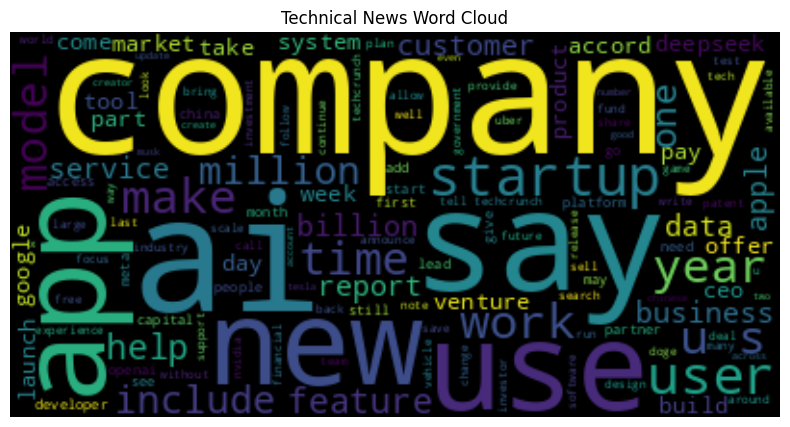

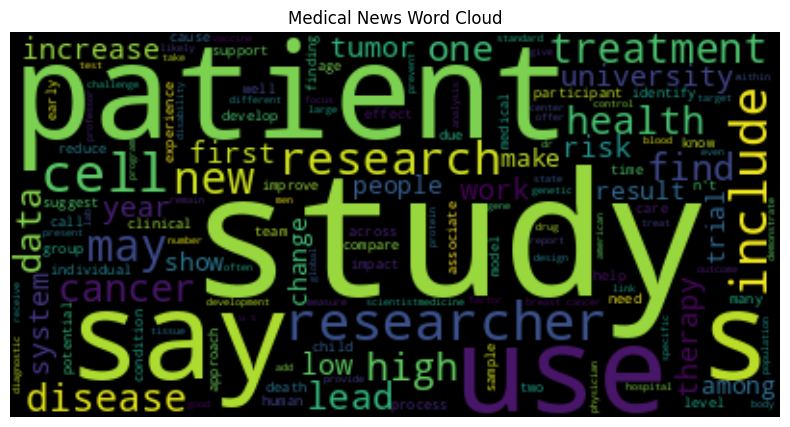

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Content sütunlarını birleştir
text_tech = " ".join(df_tech["Content"].astype(str))
text_medical = " ".join(df_medical["Content"].astype(str))

# Teknik haberler için kelime bulutu
wordcloud_tech = WordCloud().generate(text_tech)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tech, interpolation='bilinear')
plt.axis('off')
plt.title("Technical News Word Cloud")
plt.show()

# Medikal haberler için kelime bulutu
wordcloud_medical = WordCloud().generate(text_medical)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_medical, interpolation='bilinear')
plt.axis('off')
plt.title("Medical News Word Cloud")
plt.show()


SVM ve Naive Bayes ile Metin Sınıflandırması (10 Katlı Çapraz Doğrulama)


🔴 SVM Cross-validation accuracies: ['0.9524', '1.0000', '0.9048', '0.9048', '1.0000', '1.0000', '1.0000', '1.0000', '0.9524', '0.7619']
🟢 SVM Ortalama Başarı: 0.9476
🔴 Naive Bayes Cross-validation accuracies: ['0.9524', '1.0000', '0.9524', '0.9524', '1.0000', '1.0000', '1.0000', '1.0000', '0.8571', '0.8095']
🟢 Naive Bayes Ortalama Başarı: 0.9524

🔵 SVM Classification Report:
               precision    recall  f1-score   support

    Medicine       0.97      0.92      0.95       105
   Technical       0.93      0.97      0.95       105

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

🔵 SVM Confusion Matrix:
 [[ 97   8]
 [  3 102]]

🟣 Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Medicine       0.97      0.93      0.95       105
   Technical       0.94      0.97      0.95       105

    accuracy                           0.95

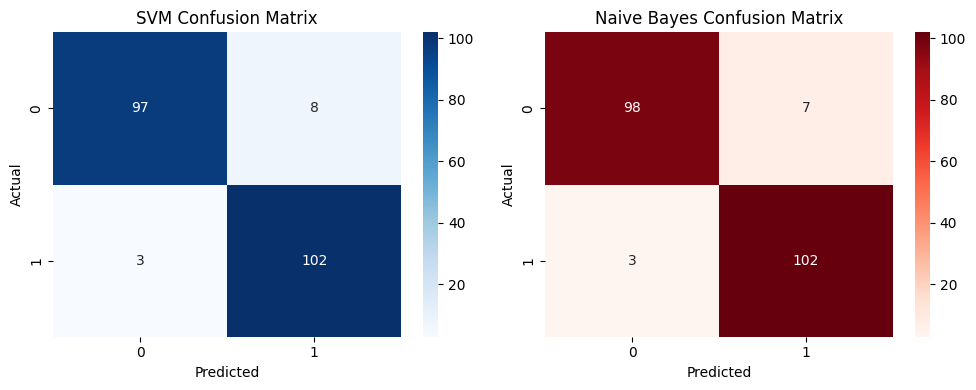

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Metin ve etiketleri ayır
X = df_final["Content"]  # metin sütunu
y = df_final["Category"] # sınıf/etiket sütunu

# 2. Bag-of-Words vektörleştirme
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)


# 3.SVM için cross-validation
svm_model = LinearSVC(max_iter=5000)
svm_scores = cross_val_score(svm_model, X_bow, y, cv=10)
print("🔴 SVM Cross-validation accuracies:", [f"{score:.4f}" for score in svm_scores])
print("🟢 SVM Ortalama Başarı:", f"{svm_scores.mean():.4f}")

# 4.Naive Bayes için cross-validation
nb_model = MultinomialNB()
nb_scores = cross_val_score(nb_model, X_bow, y, cv=10)
print("🔴 Naive Bayes Cross-validation accuracies:", [f"{score:.4f}" for score in nb_scores])
print("🟢 Naive Bayes Ortalama Başarı:", f"{nb_scores.mean():.4f}")

# Tahminleri al (10-fold cross validation ile)
y_pred_svm = cross_val_predict(svm_model, X_bow, y, cv=10)
y_pred_nb = cross_val_predict(nb_model, X_bow, y, cv=10)


# Raporlar
print("\n🔵 SVM Classification Report:\n", classification_report(y, y_pred_svm))
print("🔵 SVM Confusion Matrix:\n", confusion_matrix(y, y_pred_svm))

print("\n🟣 Naive Bayes Classification Report:\n", classification_report(y, y_pred_nb))
print("🟣 Naive Bayes Confusion Matrix:\n", confusion_matrix(y, y_pred_nb))

# Görselleştirme
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y, y_pred_svm), annot=True, fmt='d', cmap='Blues') #annot, kare içine sayılar yazılır
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y, y_pred_nb), annot=True, fmt='d', cmap='Reds')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout() #grafiklerin üst üste binmesini engeller
plt.show()

SVM'nin Yanlış Sınıflandırdığı Haberler

In [27]:
from IPython.display import display

# SVM tahminlerini df'e ekle
df_svm_wrong = df_final.copy()
df_svm_wrong["Predicted"] = y_pred_svm #Yeni sütun ekliyoruz (SVM'nin tahmin ettiği sınıflar)

# Hatalı tahmin edilenleri seç
wrong_svm = df_svm_wrong[df_svm_wrong["Category"] != df_svm_wrong["Predicted"]]

# Orijinal satır numaraları korunur
wrong_svm = wrong_svm.reset_index()

# Gösterilecek sütunlar
display_cols = ["index", "Content", "Category", "Predicted"]

# 👇 Görsel Tablo Gösterimi
display(wrong_svm[display_cols])


index  \
0      43   
1     100   
2     122   
3     127   
4     138   
5     188   
6     200   
7     201   
8     204   
9     207   
10    208   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Naive Bayes'in Yanlış Sınıflandırdığı Haberler


In [28]:
from IPython.display import display

# Naive Bayes sonuçlarını df'e ekle
df_nb_wrong = df_final.copy()
df_nb_wrong["Predicted"] = y_pred_nb #Yeni sütun ekliyoruz (Naive Bayes'in tahmin ettiği sınıflar)

# Hatalı tahmin edilenleri seç
wrong_nb = df_nb_wrong[df_nb_wrong["Category"] != df_nb_wrong["Predicted"]]

# Orijinal satır numaraları korunur
wrong_nb = wrong_nb.reset_index()

# Gösterilecek sütunlar
display_cols_nb = ["index", "Content", "Category", "Predicted"]

# Görsel Tablo Gösterimi
display(wrong_nb[display_cols_nb])


index  \
0    100   
1    127   
2    138   
3    186   
4    187   
5    188   
6    200   
7    207   
8    208   
9    209   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              